# Exploring Dandiset 001354: Hippocampal Neuronal Responses to Programmable Antigen-Gated GPCR Activation

*A practical guide to exploring and visualizing data from the DANDI Archive*

---

**Note:** This notebook was generated with the assistance of AI. Please use caution and verify the code and results before drawing scientific conclusions or using them in research.

---

## Overview of Dandiset 001354

This Dandiset contains electrophysiological recordings from mouse hippocampal CA1 neurons, focusing on the effect of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Recordings were made using current clamp techniques, capturing both membrane potential (response) and injected current (stimulus) data for each sweep.

- [Dandiset 001354 on DANDI Archive (draft version)](https://dandiarchive.org/dandiset/001354/draft)
- Data format: NWB (Neurodata Without Borders)
- Organism: Mus musculus
- Number of files: 50 NWB files
- Number of cells: 50 cells from 8 mice
- Recording region: Hippocampal CA1

**Primary data types in the Dandiset:**
- Raw voltage/current clamp traces
- Stimulus waveform traces
- Electrode and stimulus metadata
- Sweep-by-sweep tables linking stimulus/response/electrode

For full context and scientific background, see the [relevant publication in Nature (2024)](https://www.nature.com/articles/s41586-024-08282-3).

---

## What this notebook covers

This notebook guides you through:

1. Discovering and loading NWB assets in Dandiset 001354 using the DANDI API
2. Inspecting the structure of a representative NWB file
3. Visualizing example stimulus and response traces from a current clamp experiment
4. Overlaying stimulus and response for one sweep to reveal neuronal firing behaviors
5. Summarizing the intracellular recordings table (sweep metadata)
6. Discussing the structure and consistency of other NWB files in this Dandiset

All code loads NWB data by streaming from the remote DANDI servers, as in the examples below.


## Required Packages
To make full use of this notebook you should have the following packages installed in your Python environment:

- numpy
- matplotlib
- h5py
- remfile
- pynwb
- dandi
- pandas

(No installation commands are included; this notebook assumes all packages are already installed.)


## Discovering NWB Assets in Dandiset 001354

Let's use the DANDI API to list available NWB files in this dandiset.


In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Connect to DANDI, get Dandiset (draft version)
dandiset_id = "001354"
dandiset_version = "draft"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List a few example NWB files from the Dandiset
assets = dandiset.get_assets_by_glob("*.nwb")
example_files = list(islice(assets, 5))

print("Representative NWB files in Dandiset 001354:")
for asset in example_files:
    print("-", asset.path)

Representative NWB files in Dandiset 001354:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb


## Loading and Inspecting an NWB File (Streaming from DANDI)

In this example, we will load the file `sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb` to explore its structure and contents. We'll use `remfile` to stream data directly from DANDI, and `h5py`/`pynwb` to parse the format.

In [2]:
import pynwb
import h5py
import remfile

# Pick a file to explore (from earlier listing), e.g., the first example
nwb_asset_path = "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb"
asset = next(dandiset.get_assets_by_glob(nwb_asset_path))

# Open the NWB file for streaming (read-only, remote)
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)

# List top-level groups/datasets
print(f"Top-level groups/datasets in '{nwb_asset_path}':")
for key in h5_file.keys():
    print(" ", key)

# Use pynwb to parse the NWB object itself
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("\nNWBFile summary:")
print(" Identifier:", nwb.identifier)
print(" Session description:", nwb.session_description)
print(" Session start time:", nwb.session_start_time)
print(" Subject:", nwb.subject.subject_id if hasattr(nwb.subject, 'subject_id') else None)

print("\nData containers/keys:")
print(" Acquisition:", list(nwb.acquisition.keys())[:5], "...")
print(" Stimulus:", list(nwb.stimulus.keys())[:5], "...")
print(" Icephys electrodes:", list(nwb.icephys_electrodes.keys()))
print(" Devices:", list(nwb.devices.keys()))
print(" Lab metadata:", list(nwb.lab_meta_data.keys()))

Top-level groups/datasets in 'sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb':
  acquisition
  analysis
  file_create_date
  general
  identifier
  processing
  session_description
  session_start_time
  specifications
  stimulus
  timestamps_reference_time


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWBFile summary:
 Identifier: pk2024_07_17_0009
 Session description: Intracellular electrophysiology experiment.
 Session start time: 2024-07-17 18:07:19-07:00
 Subject: PK-109

Data containers/keys:
 Acquisition: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0'] ...
 Stimulus: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0'] ...
 Icephys electrodes: ['electrode-0', 'electrode-1']
 Devices: ['DeviceIcephys']
 Lab metadata: ['DandiIcephysMetadata']


## Visualizing a Voltage Response Trace (Current Clamp Recording)

Let's select the first current clamp response (`current_clamp-response-01-ch-0`) and plot the membrane potential for its full duration.


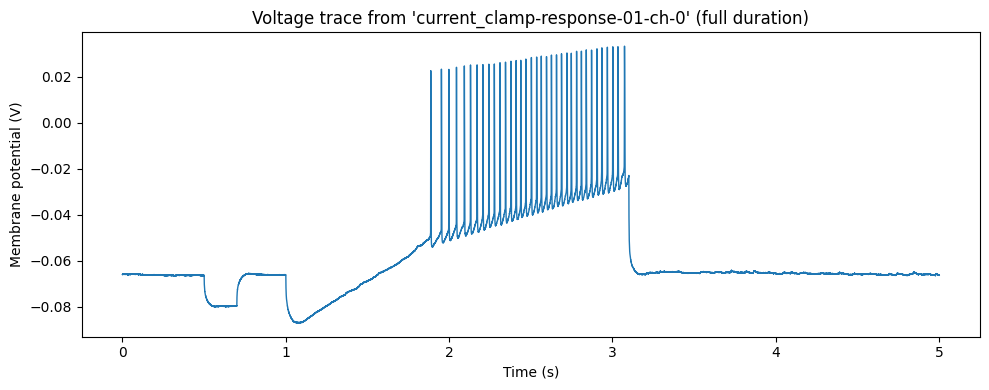

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Select response trace and extract full data
cc_name = "current_clamp-response-01-ch-0"
cc = nwb.acquisition[cc_name]
rate = cc.rate
data = np.array(cc.data[:]) * cc.conversion  # Convert to volts
time = np.arange(len(data)) / rate

plt.figure(figsize=(10, 4))
plt.plot(time, data, lw=1)
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title(f"Voltage trace from '{cc_name}' (full duration)")
plt.tight_layout()
plt.show()

## Visualizing the Corresponding Stimulus Trace

Now, plot the associated stimulus current (`stimulus-01-ch-0`) for the same sweep, across its full duration.


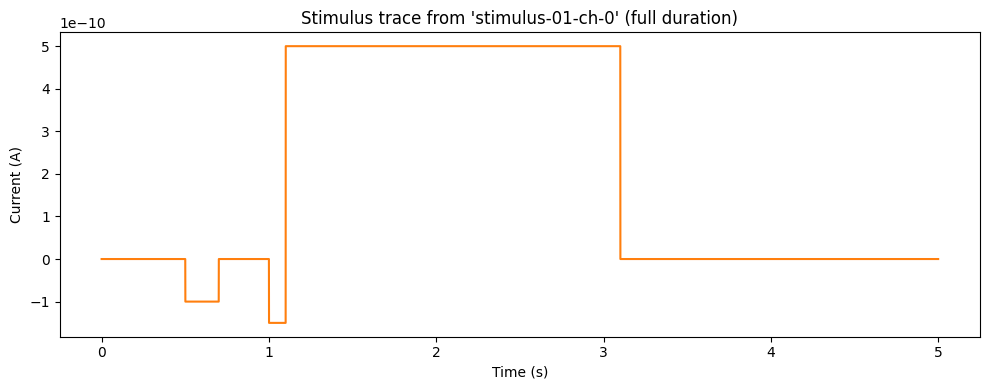

In [4]:
# Select corresponding stimulus trace
stim_name = "stimulus-01-ch-0"
stim = nwb.stimulus[stim_name]
stim_data = np.array(stim.data[:]) * stim.conversion  # Convert to amperes
stim_time = np.arange(len(stim_data)) / stim.rate

plt.figure(figsize=(10, 4))
plt.plot(stim_time, stim_data, color='tab:orange')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title(f"Stimulus trace from '{stim_name}' (full duration)")
plt.tight_layout()
plt.show()

## Overlay of Membrane Potential Response and Stimulus Current

Overlay the membrane potential trace (response) and stimulus current for the same sweep to see the temporal relationship between input and output.


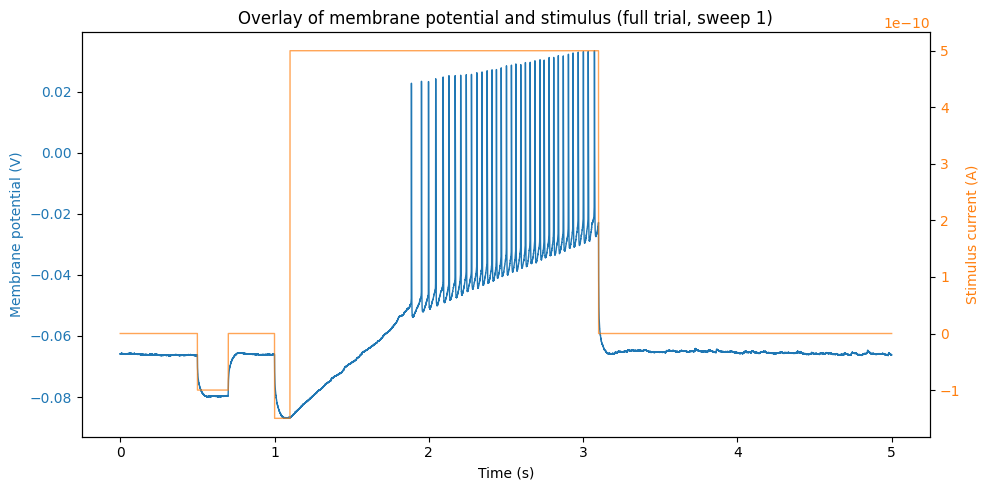

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot membrane potential (left axis)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Membrane potential (V)', color='tab:blue')
ax1.plot(time, data, color='tab:blue', lw=1)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot stimulus current (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Stimulus current (A)', color='tab:orange')
ax2.plot(stim_time, stim_data, color='tab:orange', lw=1, alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Overlay of membrane potential and stimulus (full trial, sweep 1)")
plt.tight_layout()
plt.show()

## Inspecting the Intracellular Recordings Table

Each file contains a table linking each stimulus/response sweep with metadata, including the involved electrode and trace indices. Inspect the first few rows to see what metadata is available for each sweep.


In [6]:
# Load the intracellular recordings table as a pandas DataFrame and show the head
df_icr = nwb.intracellular_recordings.to_dataframe()
print("First few rows of the intracellular recordings table:")
print(df_icr.head())

First few rows of the intracellular recordings table:
                               electrodes  \
                                       id   
(intracellular_recordings, id)              
0                                       0   
1                                       1   
2                                       2   
3                                       3   
4                                       4   

                                                                                   \
                                                                        electrode   
(intracellular_recordings, id)                                                      
0                               electrode-0 pynwb.icephys.IntracellularElectro...   
1                               electrode-1 pynwb.icephys.IntracellularElectro...   
2                               electrode-0 pynwb.icephys.IntracellularElectro...   
3                               electrode-1 pynwb.icephys.IntracellularElec

## Lab Metadata: Cell, Slice, Targeted Layer Information

The NWB file contains lab-specific metadata. This information describes the cell, slice, and anatomical context for the recording.


In [7]:
labmeta = nwb.lab_meta_data.get("DandiIcephysMetadata")
if labmeta:
    print("Lab metadata (DandiIcephysMetadata):")
    print(f" cell_id: {labmeta.cell_id}")
    print(f" slice_id: {labmeta.slice_id}")
    print(f" targeted_layer: {labmeta.targeted_layer}")
else:
    print("No lab meta data found.")

Lab metadata (DandiIcephysMetadata):
 cell_id: 2024_07_17_0009
 slice_id: 2024_07_17_0009
 targeted_layer: CA1


## Consistency Across NWB Files in the Dandiset

The overall organizational structure—top-level groups, stimulus/response traces, and sweep linkage tables—is consistent across NWB files in Dandiset 001354. This makes systematic analyses and automation feasible.

You may adapt any of the steps above to a different file by substituting the asset path, and the workflow will be unchanged.


## Summary & Next Steps

- This notebook introduced Dandiset 001354 and demonstrated essential steps for exploring NWB files streamed from the DANDI archive.
- You can list available data, inspect the structure, and visualize individual sweeps of both stimulus and response.
- The sweep metadata table enables programmatic batch processing and systematic reanalyses.

**Feel free to further extend this notebook for your specific analysis needs, such as automated spike detection, feature extraction, or comparisons across cells and conditions!**

---
